In [46]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
#kagglehub.login()


In [47]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e11_path = kagglehub.competition_download('playground-series-s5e11')

print('Data source import complete.')


Data source import complete.


In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
df = pd.read_csv(f"{playground_series_s5e11_path}/train.csv")
df_test = pd.read_csv(f"{playground_series_s5e11_path}/test.csv")

In [50]:
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [51]:
df.tail()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [53]:
df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [54]:
df.shape

(593994, 13)

In [55]:
df.isna().sum()

,0
id,0
annual_income,0
debt_to_income_ratio,0
credit_score,0
loan_amount,0
interest_rate,0
gender,0
marital_status,0
education_level,0
employment_status,0


In [56]:
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [57]:
for col in df.select_dtypes(include="object").columns:
    print(col , ":", df[col].unique())

gender : ['Female' 'Male' 'Other']
marital_status : ['Single' 'Married' 'Divorced' 'Widowed']
education_level : ['High School' "Master's" "Bachelor's" 'PhD' 'Other']
employment_status : ['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']
loan_purpose : ['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']
grade_subgrade : ['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


In [58]:
for col in df.select_dtypes(include="object").columns:
    df = pd.get_dummies(df)

In [59]:
for col in df_test.select_dtypes(include="object").columns:
    df_test = pd.get_dummies(df_test)

In [60]:
import numpy as np
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = [c for c in num_cols if c != "loan_paid_back"]  # ลบ target ออก

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [61]:
df

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back,gender_Female,gender_Male,gender_Other,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,0,29367.99,0.084,736.0,2528.42,13.67,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,22108.02,0.166,636.0,4593.10,12.92,0.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2,49566.20,0.097,694.0,17005.15,9.76,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3,46858.25,0.065,536.5,4682.48,16.10,1.0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,25496.70,0.053,665.0,12184.43,10.21,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,593989,23004.26,0.152,703.0,20958.37,10.92,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
593990,593990,35289.43,0.105,559.0,3257.24,14.62,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
593991,593991,47112.64,0.072,675.0,929.27,14.13,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
593992,593992,76748.44,0.067,740.0,16290.40,9.87,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler (scale ให้อยู่ 0–1)
scaler = MinMaxScaler()
num_cols = ['annual_income','loan_amount','debt_to_income_ratio','credit_score','interest_rate']
df[num_cols] = scaler.fit_transform(df[num_cols])
df = df.set_index('id')

df_test[num_cols] = scaler.transform(df_test[num_cols])

In [63]:
df["loan_paid_back"].nunique()

2

In [64]:
#!pip install tensorflow

In [65]:
'''
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
'''
'''
from sklearn.model_selection import StratifiedKFold
import numpy as np
Y = df["loan_paid_back"]
X = df.drop(["loan_paid_back"], axis=1)
X_test = df_test.drop("id", axis=1)
test_preds = np.zeros(len(X_test))  # เก็บ prediction ของ test set
'''
'''
model = Sequential([
    Dense(64 , activation="relu" , input_shape=(X.shape[1],)),
    Dense(32 , activation="relu"),
    Dense(1 , activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.1, verbose=1)
'''

'\nmodel = Sequential([\n    Dense(64 , activation="relu" , input_shape=(X.shape[1],)),\n    Dense(32 , activation="relu"),\n    Dense(1 , activation="sigmoid")\n])\n\nmodel.compile(optimizer=Adam(learning_rate=0.01), loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n\nhistory = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.1, verbose=1)\n'

In [66]:
'''
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).flatten()
'''

'\ny_pred = model.predict(x_test)\ny_pred = (y_pred > 0.5).astype(int).flatten()\n'

In [67]:
from sklearn.metrics import classification_report
'''
target = [1 , 0]
print(classification_report(y_test , y_pred, target_names=["0", "1"]))
'''

'\ntarget = [1 , 0]\nprint(classification_report(y_test , y_pred, target_names=["0", "1"]))\n'

In [68]:
'''
from sklearn.utils import class_weight
import numpy as np
classes = np.unique(y_train)
weights = class_weight.compute_class_weight(
    class_weight='balanced',  # auto balance
    classes=classes,
    y=y_train
)
class_weights = dict(zip(classes, weights))
'''

"\nfrom sklearn.utils import class_weight\nimport numpy as np\nclasses = np.unique(y_train)\nweights = class_weight.compute_class_weight(\n    class_weight='balanced',  # auto balance\n    classes=classes,\n    y=y_train\n)\nclass_weights = dict(zip(classes, weights))\n"

In [69]:
'''
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.1,
    class_weight=class_weights,
    verbose=1
)
'''

'\nhistory = model.fit(\n    x_train, y_train,\n    epochs=100,\n    batch_size=256,\n    validation_split=0.1,\n    class_weight=class_weights,\n    verbose=1\n)\n'

In [70]:
'''
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).flatten()
'''

'\ny_pred = model.predict(x_test)\ny_pred = (y_pred > 0.5).astype(int).flatten()\n'

In [71]:
'''
target = [1 , 0]
print(classification_report(y_test , y_pred, target_names=["0", "1"]))
'''

'\ntarget = [1 , 0]\nprint(classification_report(y_test , y_pred, target_names=["0", "1"]))\n'

In [72]:
X_test = df_test.drop(["id"], axis=1)

In [73]:
'''
pred = model.predict(X_test)
pred_binary = (pred > 0.5).astype(int).flatten()
'''

'\npred = model.predict(X_test)\npred_binary = (pred > 0.5).astype(int).flatten()\n'

In [74]:
'''
submission = pd.DataFrame({
    "id": df_test["id"],
    "loan_paid_back": pred_binary
})
submission.to_csv("submission.csv", index=False)
'''

'\nsubmission = pd.DataFrame({\n    "id": df_test["id"],\n    "loan_paid_back": pred_binary\n})\nsubmission.to_csv("submission.csv", index=False)\n'

XG BOOST VERSION

In [75]:
!pip install xgboost

In [76]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
Y = df["loan_paid_back"]
X = df.drop(["loan_paid_back"], axis=1)
X_test = df_test.drop("id", axis=1)
oof_preds = np.zeros(len(Y))  # เก็บ prediction ของ train
test_preds = np.zeros(len(X_test))  # เก็บ prediction ของ test set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [77]:
!pip install --upgrade xgboost

In [78]:
!pip install lightgbm

In [79]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
for fold, (train_idx, val_idx) in enumerate(skf.split(X, Y), 1):
    print(f"Fold {fold}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = Y.iloc[train_idx], Y.iloc[val_idx]

    # MODEL XGB
    model = xgb.XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.01,
        n_estimators=10000,
        max_depth=5
    )

    model.fit(X_train, y_train,)
    xgb_val_pred = model.predict_proba(X_val)[:, 1]
    xgb_test_pred = model.predict_proba(X_test)[:, 1]

    # Model Light GBM
    lgb_model = LGBMClassifier(
            n_estimators=10000,
            learning_rate=0.01,
            num_leaves=31, # จำนวนสูงสุดของใบไม้ สูตร num_leaves <= 2^(max_depth)
            max_depth=5
        )
    lgb_model.fit(X_train, y_train)
    lgb_val_pred = lgb_model.predict_proba(X_val)[:, 1]
    lgb_test_pred = lgb_model.predict_proba(X_test)[:, 1]

    # --- Combine predictions (ensemble) ---
    val_pred = 0.7 * xgb_val_pred + 0.3 * lgb_val_pred  # ตัวอย่าง weight XGB 70%, LGB 30%
    test_pred = 0.7 * xgb_test_pred + 0.3 * lgb_test_pred

    # เก็บ OOF prediction
    oof_preds[val_idx] = val_pred

    # เก็บ test prediction (เฉลี่ยทุก fold)
    test_preds += test_pred / skf.n_splits


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [80]:
oof_pred_class = (oof_preds > 0.5).astype(int)
print(classification_report(Y, oof_pred_class, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72    119500
           1       0.91      0.98      0.94    474494

    accuracy                           0.91    593994
   macro avg       0.90      0.80      0.83    593994
weighted avg       0.90      0.91      0.90    593994



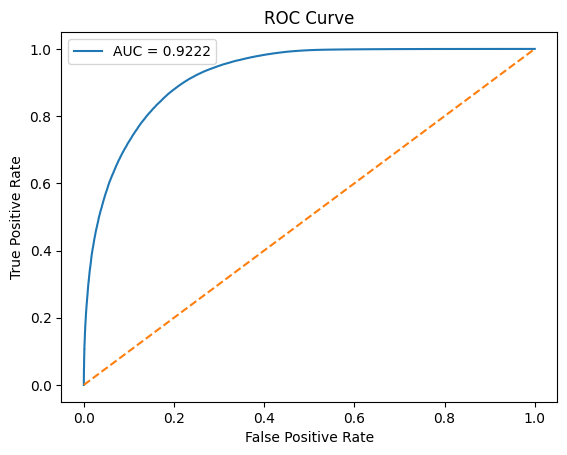

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(Y, oof_preds) # ใช้เพื่อ คำนวณ True Positive Rate (TPR) และ False Positive Rate (FPR) สำหรับ threshold ต่าง ๆ
roc_auc = auc(fpr, tpr) # 0.5 → model ไม่ดีกว่าการสุ่ม (random guess) 1.0 → model perfect classification ยิ่งใกล้ 1 → model ยิ่งดีในการแยก class 0 และ 1
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [82]:
submit = pd.read_csv(f"{playground_series_s5e11_path}/sample_submission.csv")
submit["loan_paid_back"] = test_preds
submit.head()

,id,loan_paid_back
0,593994,0.925464
1,593995,0.977326
2,593996,0.401597
3,593997,0.902547
4,593998,0.965059


In [83]:
submit.to_csv("submission.csv", index=False)

In [85]:
import joblib
joblib.dump(model, "xgb_model.pkl")
joblib.dump(lgb_model, "lgb_model.pkl")

['lgb_model.pkl']

In [84]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
'''
X_test = df_test.drop(["id"], axis=1)
pred = xgb_model.predict_proba(X_test)[:,1]

submission = pd.DataFrame({
    "id": df_test["id"],
    "loan_paid_back": pred
})
submission.to_csv("submission.csv", index=False)
'''

In [ ]:
'''
import xgboost as xgb
from sklearn.metrics import classification_report
sample_weights = np.array([class_weights[y] for y in y_train])
xgb_model4 = xgb.XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.01,
    n_estimators=10000,
    max_depth=5,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

xgb_model4.fit(x_train, y_train, sample_weight=sample_weights)
y_pred = xgb_model4.predict(x_test)
target = [1 , 0]
print(classification_report(y_test , y_pred, target_names=["0", "1"]))
'''

Oversampling

In [ ]:
#!pip install imbalanced-learn

In [ ]:
'''
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)
'''

In [ ]:
'''
import xgboost as xgb
from sklearn.metrics import classification_report

xgb_model = xgb.XGBClassifier(objective="binary:logistic" , learning_rate=0.01 , n_estimators = 10000 , max_depth=5)

xgb_model.fit(X_res ,y_res)
y_pred = xgb_model.predict(x_test)
target = [1 , 0]
print(classification_report(y_test , y_pred, target_names=["0", "1"]))
'''